In [1]:
import torch
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
    [0.55, 0.87, 0.66], # journey  (x^2)
    [0.57, 0.85, 0.64], # starts    (x^3)
    [0.22, 0.58, 0.33], # with      (x^4)
    [0.77, 0.25, 0.10], # one       (x^5)
    [0.05, 0.80, 0.55]] # step      (x^6)
)

D:\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\python38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
D:\python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


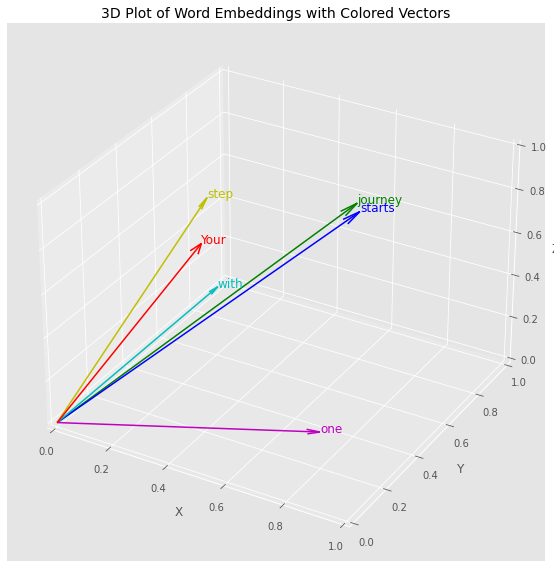

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("ggplot")

words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

if isinstance(inputs, torch.Tensor):
    x_coords = inputs[:, 0].numpy()
    y_coords = inputs[:, 1].numpy()
    z_coords = inputs[:, 2].numpy()
else:
    x_coords = inputs[:, 0]
    y_coords = inputs[:, 1]
    z_coords = inputs[:, 2]

# 🔵 Increased plot size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y']

for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=12, color=color)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors', fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
query = inputs[4]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935])


In [11]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention Weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention Weights:  tensor([0.1436, 0.2219, 0.2245, 0.1090, 0.2088, 0.0921])
Sum:  tensor(1.0000)


In [12]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim = 0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention Weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention Weights:  tensor([0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295])
Sum:  tensor(1.)


In [13]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)
print("Attention Weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attention Weights:  tensor([0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295])
Sum:  tensor(1.)


In [14]:
query = inputs[4]
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2+=attn_weights_2[i] * x_i
print(context_vec_2)

tensor([0.4671, 0.5910, 0.5266])


In [24]:
attn_scores = torch.empty(6, 6)
for i , x_i in enumerate(inputs):
    for j , x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [25]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [26]:
attn_weights = torch.softmax(attn_scores, dim = -1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [29]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row: ", row_2_sum)
print("All row sum: ", attn_weights.sum(dim=-1))

Row:  1.0
All row sum:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [30]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [31]:
print("Previos 2nd context vector: ", context_vec_2)

Previos 2nd context vector:  tensor([0.4671, 0.5910, 0.5266])
